**Loading the dataset**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/MajorProject

import cifar10

cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()

class_names = cifar10.load_class_names()
images_train, cls_train, labels_train= cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

x_train = images_train[0:45000]
y_train = labels_train[0:45000]


x_valid = images_train[45000:50000]
y_valid = labels_train[45000:50000]

x_test = images_test
y_test = labels_test

Mounted at /content/gdrive
/content/gdrive/My Drive/MajorProject
Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


**Import Statements**

In [2]:
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from keras.layers import Conv2D, Flatten, BatchNormalization, Input, Dense, Activation, Dropout, GlobalAveragePooling2D, MaxPooling2D, Concatenate, DepthwiseConv2D
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Building the Model**

In [ ]:
def depthwiseconv_block(X, filters, kernel, pool):

  X = DepthwiseConv2D((kernel, kernel), strides = (1, 1), padding = 'same', kernel_initializer = glorot_uniform(seed = 0))(X)
  X = Activation('relu')(X)
  X = BatchNormalization()(X)
  X = Conv2D(filters, (kernel, kernel), strides = (1, 1), padding = 'same', kernel_initializer = glorot_uniform(seed = 0))(X)
  X = Activation('relu')(X)
  X = BatchNormalization()(X)
  X = MaxPooling2D((pool, pool), strides = (2, 2))(X)
  X = Dropout(0.25)(X)

  return X

In [ ]:
def DepthwiseConvNet():

    X_input = Input((32,32,3))

    X = Conv2D(64, (3, 3), strides = (1,1), padding = 'same', kernel_initializer = glorot_uniform(seed = 0))(X_input)
    X = Activation('relu')(X)
    X = BatchNormalization()(X)

    X = depthwiseconv_block(X, 128, 3, 2)
    X = depthwiseconv_block(X, 256, 3, 2)
    X = depthwiseconv_block(X, 512, 2, 2)
    X = depthwiseconv_block(X, 1024, 2, 4)

    X = Flatten()(X)
    X = Dense(10, activation = 'softmax', kernel_initializer = glorot_uniform(seed = 0))(X)
    
    model = Model(inputs = X_input, outputs = X)

    return model

In [ ]:
model = DepthwiseConvNet()
model.summary()

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_315 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_315 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
depthwise_conv2d_141 (Depthw (None, 32, 32, 64)        640       
_________________________________________________________________
activation_316 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_316 (Bat (None, 32, 32, 64)        256

**Augmentation**

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center = True,
        featurewise_std_normalization = True,
        rotation_range = 15,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        horizontal_flip = True)
it_train = datagen.flow(x_train, y_train, batch_size = 100)

**Training the Model**

In [ ]:
model = DepthwiseConvNet()
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 1.0e-4), metrics = ['accuracy'])
start = time.time()
model.fit_generator(it_train, epochs = 1, validation_data = (x_valid, y_valid))
end = time.time()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


450/450 [==============================] - 55s 116ms/step - loss: 3.8202 - accuracy: 0.2232 - val_loss: 2.7975 - val_accuracy: 0.0976


In [ ]:
model = DepthwiseConvNet()
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 1.0e-4), metrics = ['accuracy'])
history = history = model.fit_generator(it_train, epochs = 200, validation_data = (x_valid, y_valid))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/200
450/450 [==============================] - 55s 115ms/step - loss: 3.7902 - accuracy: 0.2255 - val_loss: 2.7153 - val_accuracy: 0.0950
Epoch 2/200
450/450 [==============================] - 51s 113ms/step - loss: 2.5078 - accuracy: 0.3492 - val_loss: 1.7563 - val_accuracy: 0.4372
Epoch 3/200
450/450 [==============================] - 51s 114ms/step - loss: 2.1110 - accuracy: 0.3988 - val_loss: 1.7445 - val_accuracy: 0.4664
Epoch 4/200
450/450 [==============================] - 51s 113ms/step - loss: 1.8588 - accuracy: 0.4351 - val_loss: 1.7615 - val_accuracy: 0.4764
Epoch 5/200
450/450 [==============================] - 51s 114ms/step - loss: 1.6626 - accuracy: 0.4763 - val_loss: 1.7475 - val_accuracy: 0.4536
Epoch 6/200
450/450 [==============================] - 52s 115ms/step - loss: 1.5355 - accuracy: 0.5031 - val_loss: 1.6079 - val_accuracy: 0.4888
Epoch 7/200
450/450 [==============================] - 52s 114ms/step - loss: 1.4285 - accuracy: 0.5351 - val_loss: 1.6937 -

**Saving the Model, History and Time**

In [ ]:
model.save('DepthwiseConvNetAug.h5')

In [ ]:
np.save('DepthwiseConvNetAug_history.npy', history.history)

In [ ]:
with open('DepthwiseConvNetAug_time.pkl', 'wb') as f:
    pickle.dump(round(end - start), f)

**Training Analysis**

In [ ]:
with open('DepthwiseConvNetAug_time.pkl', 'rb') as f: 
    time_loaded = pickle.load(f)
print("Time taken for training (1 epoch): ", time_loaded, "seconds")

Time taken for training (1 epoch):  56 seconds


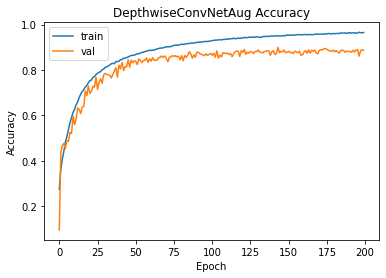

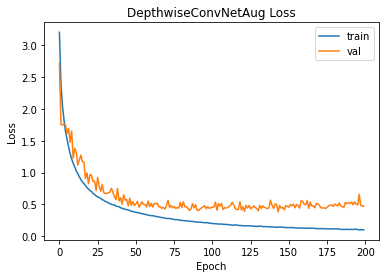

In [3]:
history_loaded = np.load('DepthwiseConvNetAug_history.npy', allow_pickle = 'TRUE').item()

plt.plot(history_loaded['accuracy'])
plt.plot(history_loaded['val_accuracy'])
plt.title('DepthwiseConvNetAug Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history_loaded['loss'])
plt.plot(history_loaded['val_loss'])
plt.title('DepthwiseConvNetAug Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

**Testing Analysis**

In [4]:
model_loaded = load_model('DepthwiseConvNetAug.h5')
y_pred = model_loaded.predict(x_test)

In [5]:
def convert(y):
  return [np.argmax(i) for i in y]

y_pred_class = convert(y_pred)
y_true_class = convert(y_test)

**********Accuracy**********

 88.41 %


**********Classification Report***********

               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1000
           1       0.95      0.95      0.95      1000
           2       0.89      0.84      0.86      1000
           3       0.81      0.76      0.78      1000
           4       0.87      0.89      0.88      1000
           5       0.93      0.70      0.80      1000
           6       0.80      0.98      0.88      1000
           7       0.91      0.93      0.92      1000
           8       0.90      0.96      0.93      1000
           9       0.89      0.95      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



**********Confusion Matrix***********




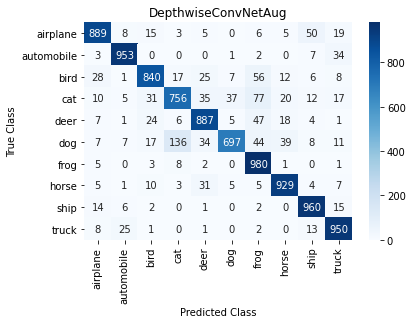

In [6]:
print("**********Accuracy**********\n\n", accuracy_score(y_true_class, y_pred_class) * 100, "%")
print("\n\n**********Classification Report***********\n\n", classification_report(y_true_class, y_pred_class))
print("\n\n**********Confusion Matrix***********\n\n")
sns.heatmap(confusion_matrix(y_true_class, y_pred_class), annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('DepthwiseConvNetAug')
plt.show()